# Аналитика в авиакомпании

## Описание проекта

«F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

### Описание данных

##### База данных об авиаперевозках:

Таблица airports — информация об аэропортах:
* airport_code — трёхбуквенный код аэропорта
* airport_name — название аэропорта
* city — город
* timezone — временная зона

Таблица aircrafts — информация о самолётах:
* aircraft_code — код модели самолёта
* model — модель самолёта
* range — количество самолётов

Таблица tickets — информация о билетах:
* ticket_no — уникальный номер билета
* passenger_id — персональный идентификатор пассажира
* passenger_name — имя и фамилия пассажира

Таблица flights — информация о рейсах:
* flight_id — уникальный идентификатор рейса
* departure_airport — аэропорт вылета
* departure_time — дата и время вылета
* arrival_airport — аэропорт прилёта
* arrival_time — дата и время прилёта
* aircraft_code – id самолёта

Таблица ticket_flights — стыковая таблица «рейсы-билеты»:
* ticket_no — номер билета
* flight_id — идентификатор рейса

Таблица festivals — информация о фестивалях:
* festival_id — уникальный номер фестиваля
* festival_date — дата проведения фестиваля
* festival_city — город проведения фестиваля
* festival_name — название фестиваля

/datasets/query_1.csv — здесь содержится информация о:
* model — модели самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — здесь содержится информация о:
* city — городах
* average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

/datasets/query_last.csv — здесь следующая информация:
* week_number — номер недели;
* ticket_amount — количество проданных билетов за неделю;
* festival_week — есть ли на этой неделе фестиваль;
* festival_name — название фестиваля

### План работы

1. Для первых двух наборов данных нужно:

 * импортировать файлы;
 * изучить данные в них;
 * проверить типы данных на корректность;
 * выбрать топ-10 городов по количеству рейсов;
 * построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
 * сделать выводы по каждому из графиков, пояснить результат.

2. Проверить гипотезу, используя третий набор данных: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время». Пояснить, как формулировались нулевая и альтернативная гипотезы; какой критерий использовался для проверки гипотез и почему.

3. Написать общий вывод.

### Открытие файлов с данными и изучение общей информации

In [1]:
#импортируем библиотеки
import pandas as pd
from scipy import stats as st

In [2]:
#прочитаем первый файл, присвоим таблице имя
model_flights_amount = pd.read_csv('/datasets/query_1.csv') 
model_flights_amount.to_csv('model_flights_amount')

In [3]:
model_flights_amount.info() #посмотрим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
model_flights_amount.head(10) #выведем первые 10 строк

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Таблица содержит два столбца:
* model — модель самолета
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

Данные отображаются корректно, замены данных не требуется.

In [5]:
#прочитаем второй файл, присвоим таблице имя
city_average_flights = pd.read_csv('/datasets/query_3.csv')
city_average_flights.to_csv('city_average_flights')

In [6]:
city_average_flights.info() #посмотрим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
city_average_flights.head(10) #выведем первые 10 строк

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Таблица содержит два столбца:

* city — город
* average_flights — среднее количество рейсов, прибывающих в город city за день в сентябре 2018 года

Данные отображаются корректно. В столбце average_flights тип данных нужно заменить на int.

In [8]:
#прочитаем третий файл, присвоим таблице имя
festivals = pd.read_csv('/datasets/query_last.csv')
festivals.to_csv('festivals')

In [9]:
festivals.info() #посмотрим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [10]:
festivals.head(10) #выведем первые 10 строк

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Таблица содержит столбцы:

* week_number — номер недели;
* ticket_amount — количество проданных билетов за неделю;
* festival_week — есть ли на этой неделе фестиваль;
* festival_name — название фестиваля

Здесь для каждой недели с 23 июля по 30 сентября 2018 года содержится количество билетов, купленных на рейсы в Москву (номер недели week_number и количество билетов ticket_amount). Отметка, проходил ли в эту неделю фестиваль, содержится в столбце festival_name.

Видим, что фестивали в Москве проходили на 30, 31 и 36 неделях. Остальные поля в столбцах festival_week и festival_name содержат значения Nan, так как фестивалей в эти периоды не было.
Заменять эти значения Nan мы не будем, так как при проверке гипотезы как раз по их наличию или отсутствию мы будем отбирать недели с фестивалями и без них.

### Подготовка данных

In [11]:
#заменяем тип данных в столбце average_flights таблицы city_average_flights
city_average_flights['average_flights'] = city_average_flights['average_flights'].astype(int)
city_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


Для замены типа данных в столбце average_flights таблицы city_average_flights применим метод astype.

In [12]:
#выберем топ-10 городов по количеству рейсов
city_average_flights.sort_values(by = 'average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129
70,Санкт-Петербург,31
54,Новосибирск,17
20,Екатеринбург,11
33,Красноярск,11
63,Пермь,10
67,Ростов-на-Дону,10
10,Брянск,10
84,Ульяновск,9
73,Советский,9


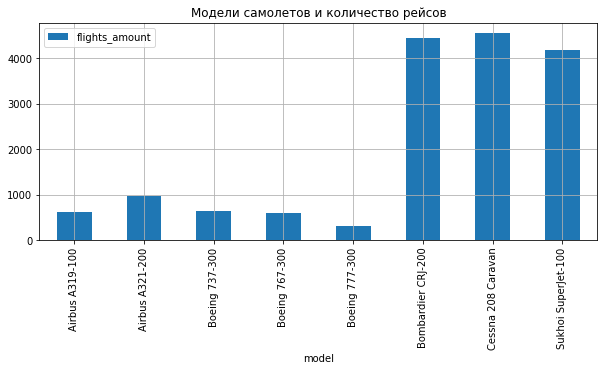

In [18]:
#построим график: модели самолетов и количество рейсов
(model_flights_amount.plot(kind = 'bar', x = 'model', title = 'Модели самолетов и количество рейсов', 
                           grid = True, figsize = (10, 4))
)

Построим график: модели самолетов и количество рейсов. Наглядно видим, что больше всего рейсов совершают три модели: Bombardier CRJ-200, Cessna 208 Caravan	и Sukhoi SuperJet-100.

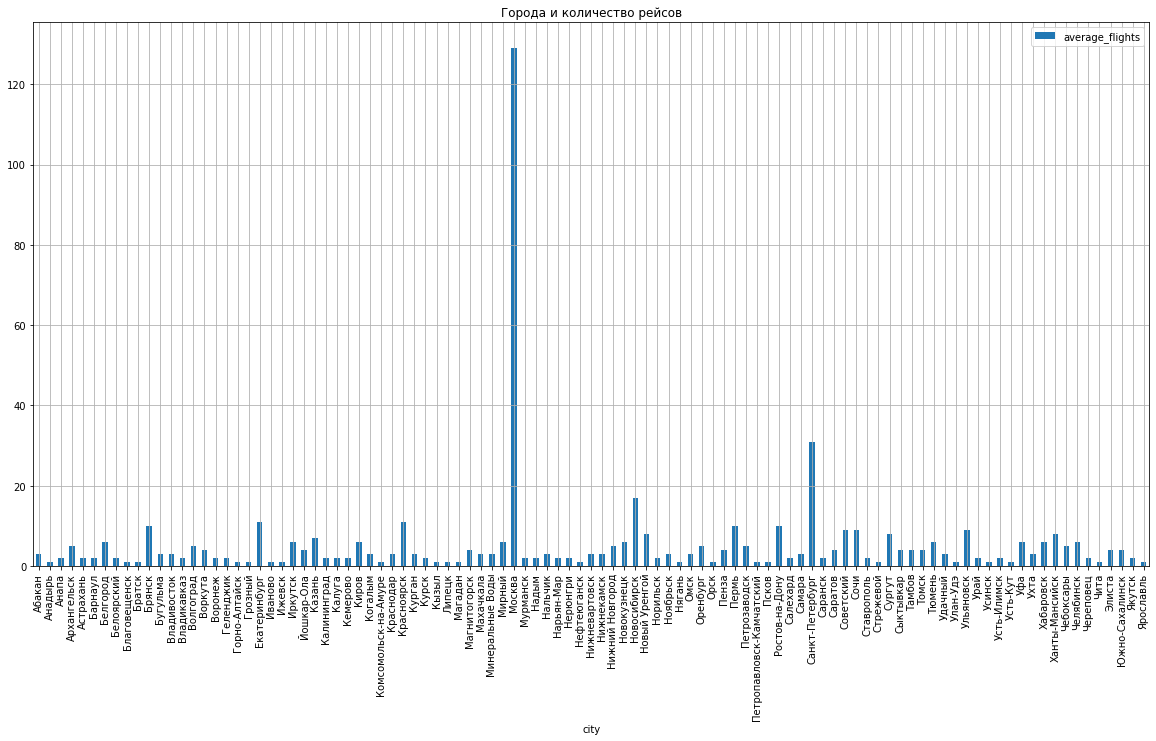

In [14]:
#построим график:города и количество рейсов
city_average_flights.plot(kind = 'bar', x = 'city', title = 'Города и количество рейсов', grid = True, figsize = (20, 10))

Построим график:города и количество рейсов. Выделяются Москва, Санкт-Петербург и Новосибирск.

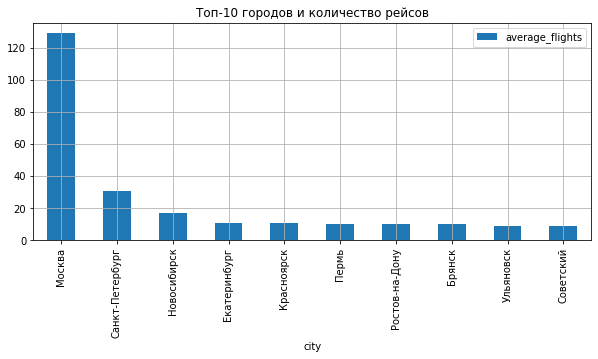

In [19]:
#построим график: топ-10 городов и количество рейсов
(city_average_flights
    .sort_values(by = 'average_flights', ascending = False).head(10)
    .plot(kind = 'bar', x = 'city', title = 'Топ-10 городов и количество рейсов', grid = True, figsize = (10, 4))
)

Построим график: топ-10 городов и количество рейсов. Выделяется Москва, затем (по убыванию) Санкт-Петербург, Новосибирск, Екатеринбург, Красноярск, Пермь, Ростов-На-Дону, Брянск, Ульяновск и Советский.

### Проверка гипотезы средствами  Python

In [16]:
#создадим переменные, соответствующие количеству билетов, проданных в недели фестивалей
festival_days = festivals[festivals['festival_week'].notnull()]['ticket_amount']
#и проданных в недели без фестивалей
not_festival_days = festivals[festivals['festival_week'].isnull()]['ticket_amount']

Методом isnull и notnull выделим значения с Nan и без них, тем самым отделив фестивальные недели от нефестивальных. Сохраним их в переменные festival_days и not_festival_days.

In [17]:
#проверим гипотезу, зададим пороговое значение
alpha = 0.05
results = st.ttest_ind(
    festival_days, 
    not_festival_days, equal_var = False)

print('p-значение:', results.pvalue)
#задаем условие
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


Проверим гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Для этого нужно сформулировать двухстороннюю нулевую гипотезу, характерным признаком которой будет знак равенства в формулировке, и альтернативную, в формулировке которой будет знак неравенства.

Сформулируем нулевую гипотезу: «Средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время». Альтернативная гипотеза: «Средний спрос на билеты во время фестивалей не равен среднему спросу на билеты в обычное время».

Получилась гипотеза о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Для нее подходит метод scipy.stats.ttest_ind (array1, array2, equal_var): он возвращает статистику разности между сравниваемыми значениями и уровень значимости для этой статистики. По результатам его работы мы понимаем, стоит ли отвергать нулевую гипотезу.

Результат 0.37 - не получилось отвергнуть нулевую гипотезу. Получается, средний спрос на билеты во время фестивалей действительно не очень отличается от среднего спроса на билеты в обычное время.

### Общий вывод

Среди предпочтений пассажиров по направлениям полетов выделяются Москва, Санкт-Петербург и Новосибирск. 
Самые востребованные модели - Bombardier CRJ-200, Cessna 208 Caravan и Sukhoi SuperJet-100.
Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время.